In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns 

In [2]:
# dados da secretaria do governo de são paulo 
# podem ser encontrados por meio do link 
# Sistema de Avaliação da Educação Básica (Saeb)
# https://repositorio.seade.gov.br/group/seade-municipios

# carregar os dados 
file_path = './educacaoideb.csv'
df = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

In [3]:

# limpeza e tratativa 

def limpar_removernan_paranumero_colunas(df, cols_to_transform):
    # 1. Dropar as linhas nulas
    df = df.dropna(how='all')
    
    # 2. Transformar as colunas especificadas de 'object' para 'string'
    for col in cols_to_transform:
        if df[col].dtype == 'object':  # Verifica se a coluna é de tipo 'object'
            df[col] = df[col].astype('string')
        
        # 3. Substituir os valores 'nan' ou 'null' por np.nan
        df[col] = df[col].replace(['nan', 'null'], np.nan)
    
    # 4. Dropar as linhas que ainda contêm NaN
    df = df.dropna(subset=cols_to_transform)
    
    # 5. Trocar os pontos (.) por vírgulas (,) nas colunas especificadas
    for col in cols_to_transform:
        df[col] = df[col].str.replace('.', ',', regex=False)
    
    # 6. Transformar as colunas em tipo numérico (considerando a vírgula como separador decimal)
    for col in cols_to_transform:
        df[col] = pd.to_numeric(df[col].str.replace(',', '.', regex=False), errors='coerce')
    
    return df



In [4]:
cols_para_numeric = ['IDEB 2015', 	'IDEB 2017', 	'IDEB 2019', 'IDEB 2021', 	'IDEB 2023']


df_ideb = limpar_removernan_paranumero_colunas(df,cols_para_numeric)
print(df_ideb['Anos'].unique())
df_ideb



['6º ao 9º ano' '1º ao 5º ano' 'Ensino médio']


,Localidade,Rede,IDEB 2015,IDEB 2017,IDEB 2019,IDEB 2021,IDEB 2023,Meta 2015,Meta 2017,Meta 2019,Meta 2021,Anos,Cod
2,Adamantina,Estadual,5.0,4.9,5.2,5.2,5.4,"5,8",6,"6,2","6,4",6º ao 9º ano,3500105.0
3,Adamantina,Municipal,6.6,6.9,6.8,6.3,6.5,"6,2","6,4","6,6","6,8",1º ao 5º ano,3500105.0
4,Adamantina,Pública,6.6,6.9,6.8,6.3,6.5,"6,2","6,4","6,6","6,8",1º ao 5º ano,3500105.0
5,Adamantina,Pública,5.0,4.9,5.2,5.2,5.4,"5,8",6,"6,2","6,4",6º ao 9º ano,3500105.0
8,Adolfo,Municipal,4.4,5.2,4.9,5.4,5.8,"4,9","5,2","5,4","5,7",6º ao 9º ano,3500204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,Votuporanga,Pública,5.2,5.2,5.7,5.5,5.6,"5,5","5,8",6,"6,2",6º ao 9º ano,3557105.0
4376,Zacarias,Estadual,4.9,5.0,5.3,5.2,5.3,5,"5,3","5,5","5,7",6º ao 9º ano,3557154.0
4377,Zacarias,Municipal,6.4,6.4,5.9,6.5,6.2,"6,2","6,5","6,7","6,9",1º ao 5º ano,3557154.0
4378,Zacarias,Pública,6.4,6.4,5.9,6.5,6.2,"6,2","6,5","6,7","6,9",1º ao 5º ano,3557154.0


In [5]:
# Função para criar novas colunas booleanas baseadas nos tipos
def criar_colunas_booleanas(df, coluna_tipo):
    tipos_unicos = df[coluna_tipo].unique()  # Identifica os tipos únicos na coluna
    for tipo in tipos_unicos:
        nome_coluna = tipo.lower()  # Nome da coluna com o tipo, em minúsculas
        df[nome_coluna] = df[coluna_tipo] == tipo  # Cria a coluna booleana
    return df


anos_ideb = criar_colunas_booleanas(df_ideb, 'Anos')
anos_ideb

,Localidade,Rede,IDEB 2015,IDEB 2017,IDEB 2019,IDEB 2021,IDEB 2023,Meta 2015,Meta 2017,Meta 2019,Meta 2021,Anos,Cod,6º ao 9º ano,1º ao 5º ano,ensino médio
2,Adamantina,Estadual,5.0,4.9,5.2,5.2,5.4,"5,8",6,"6,2","6,4",6º ao 9º ano,3500105.0,True,False,False
3,Adamantina,Municipal,6.6,6.9,6.8,6.3,6.5,"6,2","6,4","6,6","6,8",1º ao 5º ano,3500105.0,False,True,False
4,Adamantina,Pública,6.6,6.9,6.8,6.3,6.5,"6,2","6,4","6,6","6,8",1º ao 5º ano,3500105.0,False,True,False
5,Adamantina,Pública,5.0,4.9,5.2,5.2,5.4,"5,8",6,"6,2","6,4",6º ao 9º ano,3500105.0,True,False,False
8,Adolfo,Municipal,4.4,5.2,4.9,5.4,5.8,"4,9","5,2","5,4","5,7",6º ao 9º ano,3500204.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,Votuporanga,Pública,5.2,5.2,5.7,5.5,5.6,"5,5","5,8",6,"6,2",6º ao 9º ano,3557105.0,True,False,False
4376,Zacarias,Estadual,4.9,5.0,5.3,5.2,5.3,5,"5,3","5,5","5,7",6º ao 9º ano,3557154.0,True,False,False
4377,Zacarias,Municipal,6.4,6.4,5.9,6.5,6.2,"6,2","6,5","6,7","6,9",1º ao 5º ano,3557154.0,False,True,False
4378,Zacarias,Pública,6.4,6.4,5.9,6.5,6.2,"6,2","6,5","6,7","6,9",1º ao 5º ano,3557154.0,False,True,False


In [6]:
# Renomeando as colunas
# Nova lista de nomes de colunas
novos_nomes = [
    'localidade', 'rede', 'ideb_2015', 'ideb_2017', 'ideb_2019', 'ideb_2021', 'ideb_2023',
    'meta_2015', 'meta_2017', 'meta_2019', 'meta_2021', 'anos', 'cod', '6_ao_9_ano',
    '1_ao_5_ano', 'ensino_médio'
]

# Renomeando as colunas diretamente
anos_ideb.columns = novos_nomes

#estatisticas dos dados da ideb
df_ided_anos_iniciais = anos_ideb[anos_ideb['1_ao_5_ano'] == True]
idebs = ['ideb_2015', 	'ideb_2017', 	'ideb_2019', 'ideb_2021', 	'ideb_2023']
print('anos iniciais')
print(df_ided_anos_iniciais[idebs].describe())
df_ided_anos_finais = anos_ideb[anos_ideb['6_ao_9_ano'] == True]
print('anos finais')
print(df_ided_anos_finais[idebs].describe())
df_ided_anos_medio = anos_ideb[anos_ideb['ensino_médio'] == True]
print('ensino medio')
print(df_ided_anos_medio[idebs].describe())

anos iniciais
       ideb_2015  ideb_2017  ideb_2019  ideb_2021  ideb_2023
count     1248.0     1248.0     1248.0     1248.0     1248.0
mean    6.282612   6.550561   6.614263   6.158814   6.454327
std       0.5078   0.485474   0.490247   0.453166   0.538268
min          4.9        4.8        4.9        4.9        5.0
25%          5.9        6.2        6.3        5.8        6.1
50%          6.3        6.5        6.6        6.1        6.4
75%          6.6        6.8        6.9        6.4        6.7
max          8.0        8.0        8.3        8.3        9.3
anos finais
       ideb_2015  ideb_2017  ideb_2019  ideb_2021  ideb_2023
count     1212.0     1212.0     1212.0     1212.0     1212.0
mean    4.938861   5.065759    5.29769   5.328795    5.30099
std     0.435065   0.489602   0.441484   0.366366   0.400391
min          3.7        3.5        3.8        4.0        4.0
25%          4.6        4.8        5.0        5.1        5.1
50%          4.9        5.0        5.3        5.3        5.

In [7]:
print(df['Rede'].unique())

# row_embu = df_ideb.query("Localidade == 'EmbuGuaçu' and Rede == 'Municipal'")

row_embu = df_ideb[df_ideb['localidade'].str.contains('EmbuGuaçu')]

row_embu

['Estadual' 'Pública' 'Municipal' 'Federal' 'Total' 'Privada']


,localidade,rede,ideb_2015,ideb_2017,ideb_2019,ideb_2021,ideb_2023,meta_2015,meta_2017,meta_2019,meta_2021,anos,cod,6_ao_9_ano,1_ao_5_ano,ensino_médio
1152,EmbuGuaçu,Estadual,6.2,6.7,6.8,6.0,6.5,6,"6,3","6,5","6,7",1º ao 5º ano,3515103.0,False,True,False
1153,EmbuGuaçu,Estadual,4.8,5.0,5.2,5.2,5.2,"5,4","5,6","5,8","6,1",6º ao 9º ano,3515103.0,True,False,False
1154,EmbuGuaçu,Municipal,5.1,4.9,4.6,4.9,4.7,"4,5","4,7",5,"5,2",6º ao 9º ano,3515103.0,True,False,False
1155,EmbuGuaçu,Municipal,6.1,6.1,5.7,5.5,5.9,"5,4","5,7",6,"6,2",1º ao 5º ano,3515103.0,False,True,False
1156,EmbuGuaçu,Pública,6.2,6.5,6.4,5.8,6.3,"5,8","6,1","6,3","6,6",1º ao 5º ano,3515103.0,False,True,False
1157,EmbuGuaçu,Pública,4.8,5.0,5.2,5.2,5.1,"5,4","5,6","5,8","6,1",6º ao 9º ano,3515103.0,True,False,False


In [8]:
df_ideb.info()

mask = (df_ideb['rede'] == 'Municipal') & (df_ideb['6_ao_9_ano'] == True)
df_ideb[mask]


<class 'pandas.core.frame.DataFrame'>
Index: 2463 entries, 2 to 4379
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   localidade    2463 non-null   object 
 1   rede          2463 non-null   object 
 2   ideb_2015     2463 non-null   Float64
 3   ideb_2017     2463 non-null   Float64
 4   ideb_2019     2463 non-null   Float64
 5   ideb_2021     2463 non-null   Float64
 6   ideb_2023     2463 non-null   Float64
 7   meta_2015     2461 non-null   object 
 8   meta_2017     2463 non-null   object 
 9   meta_2019     2463 non-null   object 
 10  meta_2021     2463 non-null   object 
 11  anos          2463 non-null   object 
 12  cod           2452 non-null   float64
 13  6_ao_9_ano    2463 non-null   bool   
 14  1_ao_5_ano    2463 non-null   bool   
 15  ensino_médio  2463 non-null   bool   
dtypes: Float64(5), bool(3), float64(1), object(7)
memory usage: 288.6+ KB


,localidade,rede,ideb_2015,ideb_2017,ideb_2019,ideb_2021,ideb_2023,meta_2015,meta_2017,meta_2019,meta_2021,anos,cod,6_ao_9_ano,1_ao_5_ano,ensino_médio
8,Adolfo,Municipal,4.4,5.2,4.9,5.4,5.8,"4,9","5,2","5,4","5,7",6º ao 9º ano,3500204.0,True,False,False
16,Aguaí,Municipal,4.2,4.9,5.9,5.6,5.7,"4,5","4,8","5,1","5,3",6º ao 9º ano,3500303.0,True,False,False
30,Águas de Lindóia,Municipal,4.7,5.1,5.1,5.5,5.5,"5,2","5,5","5,7",6,6º ao 9º ano,3500501.0,True,False,False
42,Águas de São Pedro,Municipal,5.6,6.6,6.3,6.3,6.5,"5,5","5,7",6,"6,2",6º ao 9º ano,3500600.0,True,False,False
74,Altinópolis,Municipal,4.1,3.9,4.9,5.3,5.4,"4,6","4,9","5,1","5,4",6º ao 9º ano,3501004.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4238,Ubatuba,Municipal,4.6,4.8,4.8,5.3,4.9,"5,4","5,6","5,9","6,1",6º ao 9º ano,3555406.0,True,False,False
4250,Uchoa,Municipal,5.4,5.7,5.7,5.7,4.9,"5,7","5,9","6,2","6,4",6º ao 9º ano,3555604.0,True,False,False
4275,Urupês,Municipal,5.1,5.5,5.6,5.4,5.7,"5,6","5,8",6,"6,3",6º ao 9º ano,3556008.0,True,False,False
4288,Valinhos,Municipal,5.3,5.5,5.6,5.4,5.5,"3,3","3,6","3,8","4,1",6º ao 9º ano,3556206.0,True,False,False


In [19]:
mask = (df_ideb['rede'] == 'Municipal') & (df_ideb['6_ao_9_ano'] == True) & (df_ideb['localidade'] == 'EmbuGuaçu')
df_ideb_infantil_municipal_embuguacu = df_ideb[mask]
print(df_ideb_infantil_municipal_embuguacu['ideb_2017'])
print(df_ideb_infantil_municipal_embuguacu['ideb_2019'])
print(df_ideb_infantil_municipal_embuguacu['ideb_2021'])
print(df_ideb_infantil_municipal_embuguacu['ideb_2023'])

df_ideb.to_csv('../app/data/idepeducacaosp.csv')


1154    4.9
Name: ideb_2017, dtype: Float64
1154    4.6
Name: ideb_2019, dtype: Float64
1154    4.9
Name: ideb_2021, dtype: Float64
1154    4.7
Name: ideb_2023, dtype: Float64


In [21]:
mask = (df_ideb['rede'] == 'Municipal') & (df_ideb['1_ao_5_ano'] == True) & (df_ideb['localidade'] == 'EmbuGuaçu')
df_ideb_infantil_municipal_embuguacu = df_ideb[mask]
print(df_ideb_infantil_municipal_embuguacu['ideb_2017'])
print(df_ideb_infantil_municipal_embuguacu['ideb_2019'])
print(df_ideb_infantil_municipal_embuguacu['ideb_2021'])
print(df_ideb_infantil_municipal_embuguacu['ideb_2023'])

1155    6.1
Name: ideb_2017, dtype: Float64
1155    5.7
Name: ideb_2019, dtype: Float64
1155    5.5
Name: ideb_2021, dtype: Float64
1155    5.9
Name: ideb_2023, dtype: Float64


In [22]:
mask = (df_ideb['rede'] == 'Estadual') & (df_ideb['1_ao_5_ano'] == True) & (df_ideb['localidade'] == 'EmbuGuaçu')
df_ideb_infantil_estadual_embuguacu = df_ideb[mask]
print(df_ideb_infantil_estadual_embuguacu['ideb_2017'])
print(df_ideb_infantil_estadual_embuguacu['ideb_2019'])
print(df_ideb_infantil_estadual_embuguacu['ideb_2021'])
print(df_ideb_infantil_estadual_embuguacu['ideb_2023'])

1152    6.7
Name: ideb_2017, dtype: Float64
1152    6.8
Name: ideb_2019, dtype: Float64
1152    6.0
Name: ideb_2021, dtype: Float64
1152    6.5
Name: ideb_2023, dtype: Float64


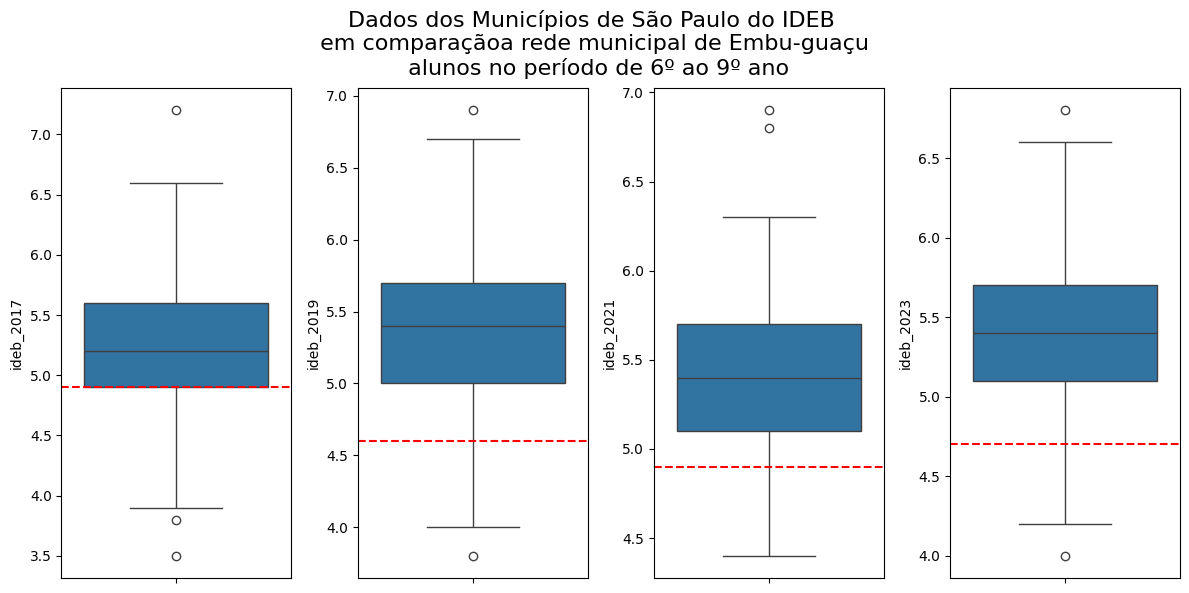

In [10]:

# Criação do gráfico
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 4, 1)  # 1 linha, 3 colunas, gráfico 1
# rede municipal 1 a 5 ano 
mask = (df_ideb['rede'] == 'Municipal') & (df_ideb['6_ao_9_ano'] == True)
df_ideb_infantil_municipal = df_ideb[mask]
sns.boxplot(data=df_ideb_infantil_municipal['ideb_2017'])
plt.axhline(4.9, color='r', linestyle='--', label='Dados Embu-Guaçu')  # Linha horizontal

# Subplot 2
plt.subplot(1, 4, 2)  # 1 linha, 3 colunas, gráfico 3
sns.boxplot(data=df_ideb_infantil_municipal['ideb_2019'])
plt.axhline(4.6, color='r', linestyle='--', label='Dados Embu-Guaçu')  # Linha horizontal

# Subplot 3
plt.subplot(1, 4, 3)  # 1 linha, 3 colunas, gráfico 2
sns.boxplot(data=df_ideb_infantil_municipal['ideb_2021'])
plt.axhline(4.9, color='r', linestyle='--', label='Dados Embu-Guaçu')  # Linha horizontal

# subplot 4
plt.subplot(1, 4, 4)  # 1 linha, 3 colunas, gráfico 3
sns.boxplot(data=df_ideb_infantil_municipal['ideb_2023'])
plt.axhline(4.7, color='r', linestyle='--', label='Dados Embu-Guaçu')  # Linha horizontal

# Título geral para o conjunto de gráficos
plt.suptitle('Dados dos Municípios de São Paulo do IDEB \n em comparaçãoa rede municipal de Embu-guaçu \n alunos no período de 6º ao 9º ano', fontsize=16)

# Exibindo o gráfico
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Ajusta o espaço para o título geral
plt.show()